## Notebook 2: Introduction to Rosenblatt Perceptrons
<b>Introduction to Soft Computing, Summer 2016 <br>
Wright State University</b>

This notebook provides Python 2 code that implements several versions of a Rosenblatt perceptron.  You can use this
notebook to experiment with Rosenblatt perceptron learning.

First, let's remind ourselves of what a Rosenblatt perceptron is:

![A Simple Neuron with Bias Folded into Weights.](neuron_3.png)

$$\mathit{\phi}\left({\mathit{\upsilon}}\right)\mathrm{{=}}{signum}\left({\mathit{\upsilon}}\right)\mathrm{{=}}\left\{{\begin{array}{c}{{if}\hspace{0.33em}\left({\mathit{\upsilon}{\mathrm{>}}{0}}\right)\hspace{0.33em}{then}\hspace{0.33em}\mathit{\phi}\left({\mathit{\upsilon}}\right)\mathrm{{=}}{1}}\\{{else}\hspace{0.33em}\mathit{\phi}\left({\mathit{\upsilon}}\right)\mathrm{{=}}\mathrm{{-}}{1}}\end{array}}\right.
$$
<br><br>

From class and from your reading you should recall that the receptive field of a single neuron of this type DETERMINES a hyperplane that splits space into two regions.  Inputs patterns that are on the hyperplane will have a receptive field of zero.  Inputs on one side of the hyperplane will have a positive receptive field and inputs on the other side will have a negative receptive field.  Once we pass the receptive field through the signum function, we'll get an output of 1 for all patterns on one side of the hyperplane and -1 for all patterns on the other side of the hyperplane or on it.

From class you'll also recall that the general equation of the hyperplane that splits space into two regions would be:

$$bias+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+...+w_{n}x_{n}=0$$

Presuming we represented the bias as weight zero and set the "zeroth" component of our input vector to a constant value of 1.0, we could also write this as:

$$\mathrm{\overrightarrow{\mathbf{w}}}\mathrm{\bullet}\overrightarrow{\mathbf{x}}\mathrm{{=}}{0}$$

in the case of a single neuron with two inputs, the input space is two-dimensional (two inputs to the neuron) and the hyperplane determined by the receptive field is actually a line that splits the plane into two regions.  Taking the inputs in the form of $\overrightarrow{\mathbf{x}}\mathrm{{=}}\left[{1\mathrm{,}{x}_{1}\mathrm{,}{x}_{2}}\right]$, we can compute the position of the line in the plane as:


$${x}_{2}\mathrm{{=}}\frac{\mathrm{{-}}{w}_{1}{x}_{1}\mathrm{{-}}{bias}}{{w}_{2}}$$

Consider the following code that allows you to experiment with the location of the line partitioning the plane (called here the decision boundary).  Try to recreate the classroom examples and/or try some of your own.

For this first pass, we will NOT use vector form, rather, we'll explicitly call out individual scalar weights as individually named variable.  We'll do an implementation later using vectors and dot products...


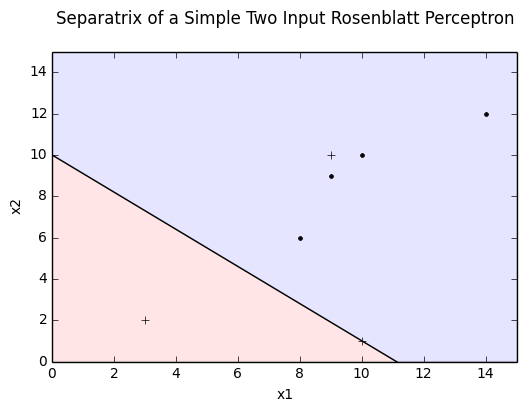

Class A input pair [10.0, 1.0]     belongs to filter class 0.0
Class A input pair [3.0, 2.0]      belongs to filter class -1.0
Class A input pair [-2.0, -5.0]    belongs to filter class -1.0
Class A input pair [9.0, 10.0]     belongs to filter class 1.0

Class B input pair [10.0, 10.0]    belongs to filter class 1.0
Class B input pair [8.0, 6.0]      belongs to filter class 1.0
Class B input pair [14.0, 12.0]    belongs to filter class 1.0
Class B input pair [9.0, 9.0]      belongs to filter class 1.0


In [2]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    


# Classes A and B.  These coorespond to the class lecture slide examples.

#Class_A = #[[ 1.0,  1.0], [ 1.0,  3.0], [ 4.0,  2.0], [ 3.0,  3.0]]
Class_B = [[10.0, 10.0], [ 8.0,  6.0], [14.0, 12.0], [ 9.0,  9.0]]
Class_A = [[10.0, 1.0], [3.0, 2.0], [-2.0, -5.0], [9.0, 10.0]]
                  
# weight and bias settings
# you can edit these to see the effects on the separatrix line.  The setting of bias = -50, weight_1 = 4.5, 
# and weight_2 = 5 is equivalent to one of the class lecture examples.

bias        =  -50
weight_1    =  4.5
weight_2    =  5

# generate the line separatrix defined by the receptive field determined
# by the weight and bias selected above.  Here I'm using Numpy to generate a list of fifty points between -15 
# and 15 (x1_separatrix_sample_points).  Then I iterate the list, making a NEW list (x2_separatrix_sample_points)
# that is composed of every point in x1_separatrix_sample_points used as an input the the equation defining
# the separatrix hyperplane (in this case, a line splitting a plane in two).  We'll hold back both of these
# lists so that we can later plot the dividing line between the two regions determined by the receptive 
# field of the neuron.  P.S. I am aware I didn't need fifty points.....

x1_separatrix_sample_points = np.linspace(-15.0, 15.0, num = 50)
x2_separatrix_sample_points = [((-weight_1 * x - bias)/weight_2) for x in x1_separatrix_sample_points]

# Here we just set up some features of the plot
plt.title('Separatrix of a Simple Two Input Rosenblatt Perceptron\n')    # Set the plot title
plt.xlabel('x1')                                                         # Set the x axis label
plt.ylabel('x2')                                                         # Set the y axis label
plt.axis([0.0, 15.0, 0.0, 15.0])                                         # The x axis will show values from 0 to 15
                                                                         # The y axis will show values from 0 to 15
                                                                         # This was my lazy way of plotting the line
                                                                         # in such a way that it always "filled the
                                                                         # whole pane.

# Plot the separatrix using a black line
plt.plot(x1_separatrix_sample_points, x2_separatrix_sample_points, color='black')  # plot the separatrix

# Fill the region on one side of the separatrix with light red, fill the region on the other with light blue
plt.fill_between(x1_separatrix_sample_points,0, x2_separatrix_sample_points, facecolor='red', alpha = 0.1)
plt.fill_between(x1_separatrix_sample_points,x2_separatrix_sample_points,15, facecolor='blue', alpha = 0.1)

# Plot the points from classes A and B
plt.plot(*zip(*Class_A), marker='+', color = 'black', ls='')            # plot the class A pairs
plt.plot(*zip(*Class_B), marker='.', color = 'black', ls='')            # plot the class B pairs

# Display the plot
plt.show()                                                              

# now, let's print out text messages labeling the class membership of each point as determined by the 
# Rosenblatt perceptrion. 

# Iterate over every point in Class_A, compute the output of the perceptron, which is its class label
for pattern in Class_A:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    print 'Class A input pair {0:15} belongs to filter class {1}'.format(pattern,y)

print

# Iterate over every point in Class_B, compute the output of the perceptron, which is its class label
for pattern in Class_B:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    print 'Class B input pair {0:15} belongs to filter class {1}'.format(pattern,y)



<hr>
Notice that the Rosenblatt Perceptron doesn't really know anything about the individual points.  It only really knows about splitting the plane into to regions and calling anything on one side "class 1" and anything on the other "class -1".  Also note that there are infinitely many Rosenblatt perceptrons that would properly classify all the given crosses and dots into separate categories.  As a look ahead, we're going to build neural architectures that separate regions with shapes more complex than hyperplanes.  We're also going to build learning algorithms that can, by making successive adjustments to weights and biases, can place those (perhaps more complex) classification boundaries in space such that all of our data is properly categorized and so that, presumably, data that was never seen during training is also categorized correctly because somehow the neural net learned relevant regions that capture the structure of the data in a general sense.

Now, as an exercise, let's rewrite the previous code using vector operations.  The next code will do the same thing as the previous code, it will just use a vector formulation.  This is practice for when naming individual weights will get too difficult to keep track of.

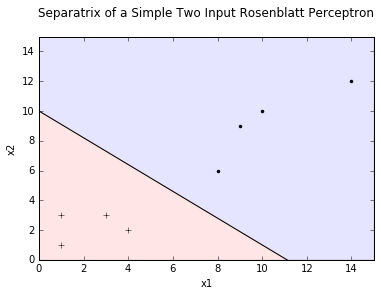

Class A input pair [1.0, 1.0]      belongs to filter class -1.0
Class A input pair [1.0, 3.0]      belongs to filter class -1.0
Class A input pair [4.0, 2.0]      belongs to filter class -1.0
Class A input pair [3.0, 3.0]      belongs to filter class -1.0

Class B input pair [10.0, 10.0]    belongs to filter class 1.0
Class B input pair [8.0, 6.0]      belongs to filter class 1.0
Class B input pair [14.0, 12.0]    belongs to filter class 1.0
Class B input pair [9.0, 9.0]      belongs to filter class 1.0


In [81]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    
    
# Classes A and B.  These coorespond to the class lecture slide examples.

Class_A = [[ 1.0,  1.0], [ 1.0,  3.0], [ 4.0,  2.0], [ 3.0,  3.0]]
Class_B = [[10.0, 10.0], [ 8.0,  6.0], [14.0, 12.0], [ 9.0,  9.0]]
                  
# weight and bias settings
# you can edit these to see the effects on the separatrix line.  Note that by the convention we adopted,
# the "zeroth" slot of the weight vector of weights going INTO a neuron is the BIAS of that neuron.
# The setting of bias = -50, weight_1 = 4.5, and weight_2 = 5 is equivalent to one of the class lecture examples.

weight_vector = np.array([-50.0, 4.5, 5])


# generate the line separatrix defined by the receptive field determined
# by the weight and bias selected above.  Here I'm using Numpy to generate a list of fifty points between -15 
# and 15 (x1_separatrix_sample_points).  Then I iterate the list, making a NEW list (x2_separatrix_sample_points)
# that is composed of every point in x1_separatrix_sample_points used as an input the the equation defining
# the separatrix hyperplane (in this case, a line splitting a plane in two).  We'll hold back both of these
# lists so that we can later plot the dividing line between the two regions determined by the receptive 
# field of the neuron.  P.S. I am aware I didn't need fifty points.....

x1_separatrix_sample_points = np.linspace(-15.0, 15.0, num = 50)
x2_separatrix_sample_points = [((-weight_vector[1] * x - weight_vector[0])/weight_2) for x in x1_separatrix_sample_points]

# Here we just set up some features of the plot
plt.title('Separatrix of a Simple Two Input Rosenblatt Perceptron\n')    # Set the plot title
plt.xlabel('x1')                                                         # Set the x axis label
plt.ylabel('x2')                                                         # Set the y axis label
plt.axis([0.0, 15.0, 0.0, 15.0])                                         # The x axis will show values from 0 to 15
                                                                         # The y axis will show values from 0 to 15
                                                                         # This was my lazy way of plotting the line
                                                                         # in such a way that it always "filled the
                                                                         # whole pane.

# Plot the separatrix using a black line
plt.plot(x1_separatrix_sample_points, x2_separatrix_sample_points, color='black')  # plot the separatrix

# Fill the region on one side of the separatrix with light red, fill the region on the other with light blue
plt.fill_between(x1_separatrix_sample_points,0, x2_separatrix_sample_points, facecolor='red', alpha = 0.1)
plt.fill_between(x1_separatrix_sample_points,x2_separatrix_sample_points,15, facecolor='blue', alpha = 0.1)

# Plot the points from classes A and B
plt.plot(*zip(*Class_A), marker='+', color = 'black', ls='')            # plot the class A pairs
plt.plot(*zip(*Class_B), marker='.', color = 'black', ls='')            # plot the class B pairs

# Display the plot
plt.show()                                                              

# now, let's print out text messages labeling the class membership of each point as determined by the 
# Rosenblatt perceptrion. 

# Iterate over every point in Class_A, compute the output of the perceptron, which is its class label
for pattern in Class_A:
    y = np.sign(np.dot(weight_vector, [1] + pattern))  # As an exercise, figure out what this means and why I did it
    print 'Class A input pair {0:15} belongs to filter class {1}'.format(pattern,y)

print

# Iterate over every point in Class_B, compute the output of the perceptron, which is its class label
for pattern in Class_B:
    y = np.sign(np.dot(weight_vector, [1] + pattern)) # As an exercise, figure out what this means and why I did it
    print 'Class B input pair {0:15} belongs to filter class {1}'.format(pattern,y)



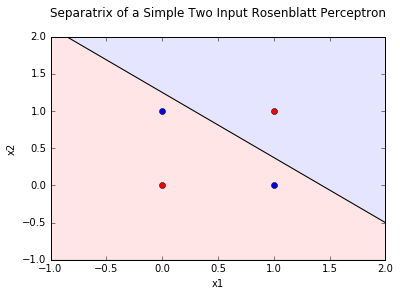

Class A input pair [0.0, 0.0]      belongs to filter class -1.0
Class A input pair [1.0, 1.0]      belongs to filter class 1.0

Class B input pair [0.0, 1.0]      belongs to filter class -1.0
Class B input pair [1.0, 0.0]      belongs to filter class -1.0


In [82]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    
    
# Classes A and B.  Taking 0 to be FALSE and 1 to be TRUE, Class A is the set of patterns for which
# the exclusive or (XOR) function would return FALSE and Class B is the set of patterns for which 
# the XOR function would return TRUE.

Class_A = [[ 0.0, 0.0], [ 1.0,  1.0]]
Class_B = [[ 0.0, 1.0], [ 1.0,  0.0]] 
                  
# weight and bias settings.  the settings of bias = -5, weight_1 = 3.5, and weight_2 = 4 will determine
# a line that DOES NOT properly catagorize the patterns.  In fact, no matter what you set these values to
# be, you will NEVER create a single line that properly puts the class A points on one side of the line
# and class B points on the other.  XOR is not linearly seperable.  Give it a shot and see what happens if you 
# will....

bias        =  -5
weight_1    =  3.5
weight_2    =  4

# generate the line separatrix defined by the receptive field determined
# by the weight and bias selected above.  Here I'm using Numpy to generate a list of fifty points between -15 
# and 15 (x1_separatrix_sample_points).  Then I iterate the list, making a NEW list (x2_separatrix_sample_points)
# that is composed of every point in x1_separatrix_sample_points used as an input the the equation defining
# the separatrix hyperplane (in this case, a line splitting a plane in two).  We'll hold back both of these
# lists so that we can later plot the dividing line between the two regions determined by the receptive 
# field of the neuron.  P.S. I am aware I didn't need fifty points.....

x1_separatrix_sample_points = np.linspace(-15.0, 15.0, num = 50)
x2_separatrix_sample_points = [((-weight_1 * x - bias)/weight_2) for x in x1_separatrix_sample_points]

# Here we just set up some features of the plot
plt.title('Separatrix of a Simple Two Input Rosenblatt Perceptron\n')    # Set the plot title
plt.xlabel('x1')                                                         # Set the x axis label
plt.ylabel('x2')                                                         # Set the y axis label
plt.axis([-1.0, 2.0, -1.0, 2.0])                                         # The x axis will show values from 0 to 2
                                                                         # The y axis will show values from 0 to 2
                                                                         # This was my lazy way of plotting the line
                                                                         # in such a way that it always "filled the
                                                                         # whole pane.

# Plot the separatrix using a black line
plt.plot(x1_separatrix_sample_points, x2_separatrix_sample_points, color='black')  # plot the separatrix

# Fill the region on one side of the separatrix with light red, fill the region on the other with light blue
plt.fill_between(x1_separatrix_sample_points,-1, x2_separatrix_sample_points, facecolor='red', alpha = 0.1)
plt.fill_between(x1_separatrix_sample_points,x2_separatrix_sample_points,15, facecolor='blue', alpha = 0.1)

# Plot the points from classes A and B
plt.plot(*zip(*Class_A), marker='o', color = 'red', ls='')             # plot the class A pairs
plt.plot(*zip(*Class_B), marker='o', color = 'blue', ls='')            # plot the class B pairs

# Display the plot
plt.show()                                                              

# now, let's print out text messages labeling the class membership of each point as determined by the 
# Rosenblatt perceptrion. 

# Iterate over every point in Class_A, compute the output of the perceptron, which is its class label
for pattern in Class_A:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    print 'Class A input pair {0:15} belongs to filter class {1}'.format(pattern,y)

print

# Iterate over every point in Class_B, compute the output of the perceptron, which is its class label
for pattern in Class_B:
    y = np.sign(bias + weight_1 * pattern[0] + weight_2 * pattern[1])
    print 'Class B input pair {0:15} belongs to filter class {1}'.format(pattern,y)



<hr>
So, by now you should have convinced yourself that XOR is NOT "linearly separable" and that there's no way to properly classify the "XOR true" and "XOR false" classes with a single line.  Further, if something as simple as XOR can't be properly classified as with a single line (hyperplane) decision boundary, then it stands to reason that there's lots of other more complex data sets out there that are also (ultimately) not linearly separable and can not be classified by a simple Rosenblatt perceptron that does only hyperplanes.  Fixing that problem will be the subject of a future notebook, but as a preview, consider the following neural network:

![A Simple Neuron with Bias Folded into Weights.](xor_rosenblatt.png)

<br>
Note that this is a Rosenblatt perceptron, so the transfer function of ALL neurons is:

$$\mathit{\phi}\left({\mathit{\upsilon}}\right)\mathrm{{=}}{signum}\left({\mathit{\upsilon}}\right)\mathrm{{=}}\left\{{\begin{array}{c}{{if}\hspace{0.33em}\left({\mathit{\upsilon}{\mathrm{>}}{0}}\right)\hspace{0.33em}{then}\hspace{0.33em}\mathit{\phi}\left({\mathit{\upsilon}}\right)\mathrm{{=}}{1}}\\{{else}\hspace{0.33em}\mathit{\phi}\left({\mathit{\upsilon}}\right)\mathrm{{=}}\mathrm{{-}}{1}}\end{array}}\right.
$$
<br>
<br>

Manually evaluate the above neural network for all the input patterns [0, 0], [0, 1], [1, 0] and [0, 1].  See what you get for each and if the outputs of that final neuron serve as an effective class label for the XOR function.  Then, try other patterns with larger or smaller magnitudes that 1.0, any observations?

Now that you've done that, take a look at the following code and do the following:

<ol>
<li>Figure out how the multi-layer network is implemented as Python code.  Everything in here
    has appeared previously in this or earlier notebooks.
<li>Why in some places am I using the Numpy sign method and in some places I'm using my own r_sign function?
    There's a reason (other than sloppy coding).  What IS that reason?  What happens if I use the Numpy
    sign methods everywhere?  Why?  Is that a bad thing?
</ol>

In [83]:
%matplotlib inline                  
            

import numpy as np                  # This command imports the numpy package.  Numpy provides support
                                    # for scientific computing.  We'll use the linear algebra support 
                                    # a great deal.  We're importing it as "np" so we don't have to 
                                    # type out "numpy" in full when using its features.  Yeah, I'm 
                                    # that lasy.  Also, this is pretty standard practice because 
                                    # everyone is that lazy.
                    
import math as math                 # This command imports the math package.  Herin is support of 
                                    # various math routines we'll need.
    
import matplotlib.pyplot as plt     # This command imports the "matlab like plotting package". We'll 
                                    # use this to make various data plots and graphs to display results.
    


def r_sign(x):
    # I really don't want to do this... BUT the signum (sign) in numpy returns zero for zero input.
    # To match what we're doing in the book, slides, and examples, I'm mapping zero input to an 
    # output of 1... that is, we're assuming that things that fall ON the hyperplane are arbitrarally
    # counted as being on the "positive" side of the line, since we're not counting "on the separator"
    # as a category.
    
    if x <= 0:
        return -1.0
    else:
        return 1

    

# Classes A and B.  Taking 0 to be FALSE and 1 to be TRUE, Class A is the set of patterns for which
# the exclusive or (XOR) function would return FALSE and Class B is the set of patterns for which 
# the XOR function would return TRUE.

Class_A = [[ 0.0, 0.0], [ 1.0,  1.0]]
Class_B = [[ 0.0, 1.0], [ 1.0,  0.0]] 
                  
layer_one_weights = np.transpose(np.array([[-5.0, 3.5, 4.0],
                                           [-2.0, 3.5, 4.0]
                                          ]))

layer_two_weights = np.transpose(np.array([0.0, -1.0, 1.0]))

# Iterate over every point in Class_A, compute the output of the perceptron, which is its class label
for pattern in Class_A:
    layer_one_output  = np.insert(np.sign(np.dot([1] + pattern, layer_one_weights)),0,1)
    layer_two_output  = r_sign(np.dot(layer_one_output, layer_two_weights)) 
    print 'Class A input pair {0:15} belongs to filter class {1}'.format(pattern,layer_two_output)

print

# Iterate over every point in Class_B, compute the output of the perceptron, which is its class label
for pattern in Class_B:
    layer_one_output  = np.insert(np.sign(np.dot([1] + pattern, layer_one_weights)),0,1)
    layer_two_output  = r_sign(np.dot(layer_one_output, layer_two_weights))                                   
    print 'Class B input pair {0:15} belongs to filter class {1}'.format(pattern,layer_two_output)

Class A input pair [0.0, 0.0]      belongs to filter class -1.0
Class A input pair [1.0, 1.0]      belongs to filter class -1.0

Class B input pair [0.0, 1.0]      belongs to filter class 1
Class B input pair [1.0, 0.0]      belongs to filter class 1


#### Informal Homework Exercise
As an exercise, think about how each neuron in the first layer creates a separate linear separation boundary and how the single neuron in the second layer makes a "second level descision boundary" using as inputs the "first level descisions" made in the first layer.  It might help to draw the two decision boundaries determined by the two neurons in the first layer and how executing these descisions transforms every point in the input set into a new coordinate system determined by the first layer decisions with the second layer descision operating in that "transformed" space.

Sound confusing?  It won't be in a week or so.  That being said, see how far you can get with it at this early stage.